### 🔹 1. Understanding PCA Step-by-Step

Given a dataset **$X \in \mathbb{R}^{m \times n}$**, where:
- **$m$** is the number of samples.
- **$n$** is the number of features.

PCA finds a set of **orthonormal basis vectors** (principal components) **that maximize variance**.

---

## 📏 2. Standardizing Data

PCA is sensitive to the **scale of features**, so we **standardize the data**:

$$
X_{\text{std}} = \frac{X - \mu}{\sigma}
$$

where:
- **$\mu$** is the mean of each feature.
- **$\sigma$** is the standard deviation of each feature.

After standardization:
- **Mean of each feature = 0**.
- **Variance of each feature = 1**.

✅ **Why?**  
- PCA finds directions of **maximum variance**.  
- Standardization ensures that features **with larger scales** do not dominate the analysis.

---

## 📊 3. Covariance Matrix: Capturing Variability

The **covariance matrix ($C$)** measures relationships between features:

$$
C = \frac{1}{m} X^T X
$$

where:
- **$C \in \mathbb{R}^{n \times n}$** is a **square symmetric matrix**.
- **$C_{ij}$** represents the **covariance** between feature **$i$** and **$j$**:

  $$
  C_{ij} = \frac{1}{m} \sum_{k=1}^{m} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j)
  $$

✅ **What does it tell us?**  
- **If $C_{ij}$ is large** → Features $i$ and $j$ are strongly correlated.  
- **If $C_{ij} \approx 0$** → Features $i$ and $j$ are independent.  

⚠ **PCA assumes linear relationships between features**.

---

## 🔢 4. Eigenvalues & Eigenvectors: Finding Principal Components

To **find new axes (principal components)**, we compute the **eigenvectors and eigenvalues** of the covariance matrix.

The **eigenvalue equation**:

$$
C v = \lambda v
$$

where:
- **$v$** is an eigenvector (principal component).
- **$\lambda$** is the corresponding eigenvalue (variance captured by $v$).

### **How to Interpret?**
- **Eigenvectors** → Define **new axes** (directions of maximum variance).
- **Eigenvalues** → Indicate **how much variance** each axis captures.

✅ **Sort eigenvectors by decreasing eigenvalues** → The first principal component captures the most variance.

---

## 🔄 5. Dimensionality Reduction with PCA

### **Step 1: Select the Top $k$ Components**
Choose **$k$** eigenvectors with the **largest eigenvalues**.

Define **$V_k$**, the **projection matrix**:

$$
V_k = [ v_1 \quad v_2 \quad \dots \quad v_k ]
$$

where:
- **$V_k \in \mathbb{R}^{n \times k}$**
- Each column **$v_i$** is a principal component.

### **Step 2: Project Data onto the New Space**
Transform the original data **$X$** into the **lower-dimensional space**:

$$
X' = X V_k
$$

where:
- **$X' \in \mathbb{R}^{m \times k}$** (new dataset in reduced dimensions).

✅ **PCA preserves the most important variance while reducing feature space.**

---

## 🎯 6. How Many Components to Keep? (Explained Variance)

The **explained variance ratio** measures how much **total variance** is captured by the first **$k$ components**:

$$
\text{Explained Variance} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

Use **cumulative explained variance** to decide **optimal $k$**:

- **Keep $k$ components that explain at least 95% of the variance**.
- Plot **explained variance vs. number of components** (Elbow Method).

---

## ✅ 7. Summary of PCA Mathematics
✔ **PCA finds new orthogonal axes (principal components) that maximize variance.**  
✔ **It uses eigenvalues & eigenvectors of the covariance matrix to determine these axes.**  
✔ **Data is projected onto the top $k$ components to reduce dimensionality while preserving variance.**  

🚀 **Next: Let's implement PCA in Python!**

In [1]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


## 📂 3. Loading and Preprocessing Data

We will use the **Digits dataset**, which contains **handwritten digit images**.


In [2]:
# Load dataset (Digits)
digits = load_digits()
X = digits.data  # Features
y = digits.target  # Labels

# Standardize the data (PCA is affected by scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display dataset shape
print(f"Dataset shape: {X_scaled.shape}")


Dataset shape: (1797, 64)


## 🤖 4. Applying PCA

We will reduce the dataset from **64 dimensions** to **2 principal components**.


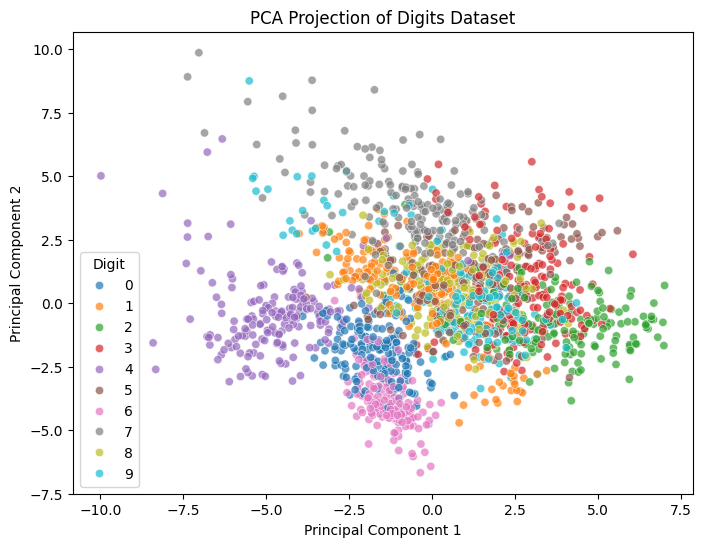

In [3]:
# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Target"] = y

# Plot PCA result
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Target", palette="tab10", data=df_pca, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Digits Dataset")
plt.legend(title="Digit")
plt.show()


## 📊 5. Explained Variance Ratio

The **explained variance ratio** shows **how much variance each principal component captures**.


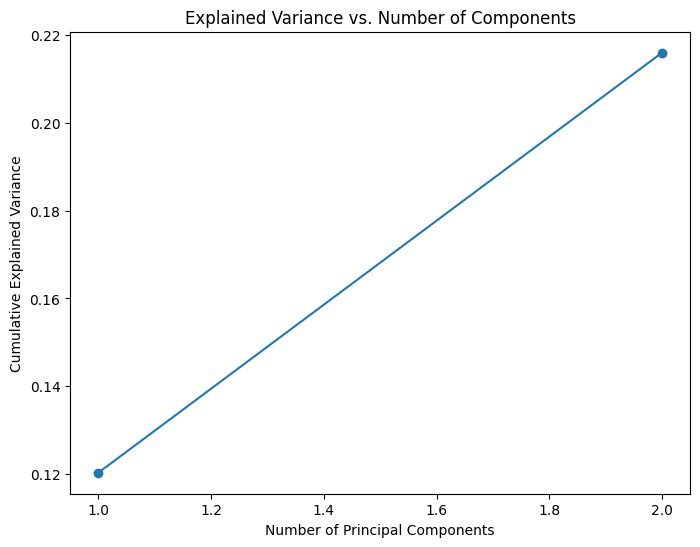

Explained Variance by First 2 PCs: 0.2159


In [4]:
# Plot explained variance ratio
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="-")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

# Print explained variance
print(f"Explained Variance by First 2 PCs: {np.sum(pca.explained_variance_ratio_[:2]):.4f}")


# 📖 6. Correspondence Analysis (CA & MCA) - A Complete Guide

In this section, we explore **Correspondence Analysis (CA)** and **Multiple Correspondence Analysis (MCA)**—two techniques related to **PCA but specialized for categorical data**.

---

## 📖 1. What is Correspondence Analysis (CA)?
**Correspondence Analysis (CA)** is a **dimensionality reduction technique** designed for **categorical data**.  
It is often used for **analyzing contingency tables** (cross-tabulations of categorical variables).

✅ **Similar to PCA, but for categorical variables**  
✅ **Helps visualize associations between categories**  

⚠ **Unlike PCA, CA is based on chi-square distances rather than variance.**  

---

## 🧮 2. Mathematical Foundations of CA

Given a **contingency table** **$X$** of size **$(m \times n)$**:
- **Rows** represent categories of one variable.
- **Columns** represent categories of another variable.

1️⃣ **Compute Row and Column Totals (Marginals)**

Compute row **totals ($r_i$)** and column **totals ($c_j$)**:

$$
r_i = \sum_j X_{ij}, \quad c_j = \sum_i X_{ij}
$$

2️⃣ **Compute Row and Column Profiles**

Normalize the contingency table:

$$
P_{ij} = \frac{X_{ij}}{\sum_{i,j} X_{ij}}
$$

Define row and column **profiles**:

$$
R_{ij} = \frac{X_{ij}}{r_i}, \quad C_{ij} = \frac{X_{ij}}{c_j}
$$

3️⃣ **Compute the Chi-Square Distance Matrix**

CA **uses chi-square distances** instead of Euclidean distances:

$$
D_{ij}^2 = \sum_k \frac{(R_{ik} - C_{jk})^2}{C_{jk}}
$$

4️⃣ **Compute the Singular Value Decomposition (SVD)**

We decompose the standardized data matrix:

$$
S = U \Sigma V^T
$$

where:
- **$U$** = Left singular vectors (rows)
- **$\Sigma$** = Diagonal matrix of singular values
- **$V$** = Right singular vectors (columns)

✅ The **principal components of CA** are derived from these singular values.

---

## 📏 3. Multiple Correspondence Analysis (MCA)

When we have **more than two categorical variables**, we use **Multiple Correspondence Analysis (MCA)**.  
MCA is an extension of CA that applies **to multi-way contingency tables**.

🔹 **MCA transforms categorical variables into a numerical space** using a **disjunctive coding table**.

### 🔹 Steps in MCA:
1. **Convert categorical variables into a binary matrix**.
2. **Compute row and column profiles**.
3. **Perform SVD on the standardized data matrix**.
4. **Extract principal components** (similar to PCA).

✅ MCA is commonly used in **market segmentation, sociology, and survey analysis**.

---

## ✅ 4. Summary of CA & MCA Mathematics
✔ **CA finds associations between two categorical variables in a contingency table.**  
✔ **Uses chi-square distances instead of variance.**  
✔ **MCA generalizes CA to multiple categorical variables.**  

🚀 **Next: Let's implement CA & MCA in Python!**


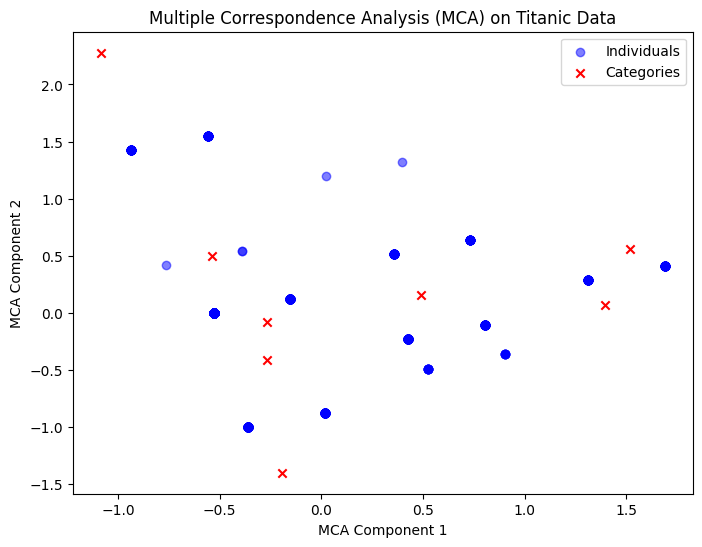

In [5]:
import prince  # For CA & MCA


# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select categorical variables for MCA
df_cat = df[["Pclass", "Sex", "Embarked"]].dropna()

# Apply Multiple Correspondence Analysis (MCA)
mca = prince.MCA(n_components=2, random_state=42)
mca.fit(df_cat)

# Get transformed row coordinates (individuals in reduced space)
mca_rows = mca.transform(df_cat)

# Get transformed column coordinates (categories in reduced space)
mca_columns = mca.column_coordinates(df_cat)

# Plot MCA Results
plt.figure(figsize=(8, 6))

# Scatter plot for row projections (individuals)
plt.scatter(mca_rows.iloc[:, 0], mca_rows.iloc[:, 1], alpha=0.5, label="Individuals", color="blue")

# Scatter plot for column projections (categories)
plt.scatter(mca_columns.iloc[:, 0], mca_columns.iloc[:, 1], color="red", marker="x", label="Categories")

# Labels and title
plt.xlabel("MCA Component 1")
plt.ylabel("MCA Component 2")
plt.title("Multiple Correspondence Analysis (MCA) on Titanic Data")
plt.legend()
plt.show()

# 📖 7. t-Distributed Stochastic Neighbor Embedding (t-SNE) - Mathematical Foundations

## 🔹 1. What is t-SNE?
t-SNE is a **non-linear dimensionality reduction technique** primarily used for **visualization**.  
Unlike PCA, which **preserves global variance**, t-SNE **preserves local structure**, meaning similar points in high-dimensional space remain close in low-dimensional projections.

---

## 📊 2. The Mathematics Behind t-SNE

t-SNE works by converting distances **between high-dimensional points into probabilities**, then tries to **match those probabilities in lower dimensions**.

### 🔹 1. Compute Similarity in High-Dimensional Space

For each **pair of points ($x_i, x_j$) in high-dimensional space**, we define the **similarity** using a **Gaussian distribution**:

$$
p_{j|i} = \frac{\exp(- || x_i - x_j ||^2 / 2\sigma_i^2 )}{\sum_{k \neq i} \exp(- || x_i - x_k ||^2 / 2\sigma_i^2 )}
$$

where:
- **$p_{j|i}$** is the probability that **$x_j$** is a neighbor of **$x_i$**.
- **$\sigma_i$** controls the neighborhood size (adaptive bandwidth for different points).
- **The denominator normalizes the probabilities**.

Since **similarity should be symmetric**, we define:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

---

### 🔹 2. Compute Similarity in Low-Dimensional Space

In lower dimensions, we replace the **Gaussian function** with a **Student’s t-distribution** (which has heavier tails):

$$
q_{ij} = \frac{(1 + || y_i - y_j ||^2)^{-1}}{\sum_{k \neq l} (1 + || y_k - y_l ||^2)^{-1}}
$$

where:
- **$y_i$ and $y_j$** are points in the **lower-dimensional space**.
- **$q_{ij}$** measures similarity using **t-distribution**, which better preserves local structure.

✅ **Why use t-distribution in lower dimensions?**  
- It **avoids crowding effects** (helps points spread out better).  
- It **prevents collapsing of clusters** that Gaussian-based approaches may cause.

---

### 🔹 3. Optimize Mapping Using KL-Divergence

t-SNE tries to **minimize the difference** between **high-dimensional similarities ($p_{ij}$) and low-dimensional similarities ($q_{ij}$)**.  
This is done using the **Kullback-Leibler (KL) divergence**:

$$
C = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

✅ **Key Properties of KL Divergence:**
- Measures how much **$q_{ij}$** (low-dimensional representation) differs from **$p_{ij}$** (high-dimensional similarity).
- If **$q_{ij} \approx p_{ij}$**, the mapping is good.
- If **$q_{ij}$ is too different from $p_{ij}$**, we adjust **$y_i$**.

**Optimization is performed using Stochastic Gradient Descent (SGD)** to iteratively update **$y_i$**.

---

## 📏 4. Hyperparameters in t-SNE

t-SNE has a few critical hyperparameters that affect performance:

1️⃣ **Perplexity ($\beta$)**
   - Controls **balance between local and global structure**.
   - **Low perplexity (5-30)** → Focuses on **local** structure.
   - **High perplexity (>50)** → Captures **more global structure**.

2️⃣ **Learning Rate**
   - Too **high** → Model diverges.
   - Too **low** → Convergence is too slow.

3️⃣ **Iterations**
   - t-SNE takes time to converge (often needs 1000+ iterations).
   - Using **early exaggeration** helps clusters separate initially.

---

## ✅ 5. Summary of t-SNE Mathematics
✔ **t-SNE preserves local relationships by converting distances into probabilities.**  
✔ **High-dimensional similarities ($p_{ij}$) are modeled with Gaussian distribution.**  
✔ **Low-dimensional similarities ($q_{ij}$) use Student’s t-distribution.**  
✔ **Minimization of KL-Divergence optimizes the projection.**  

🚀 **Next: Let's implement t-SNE in Python!**


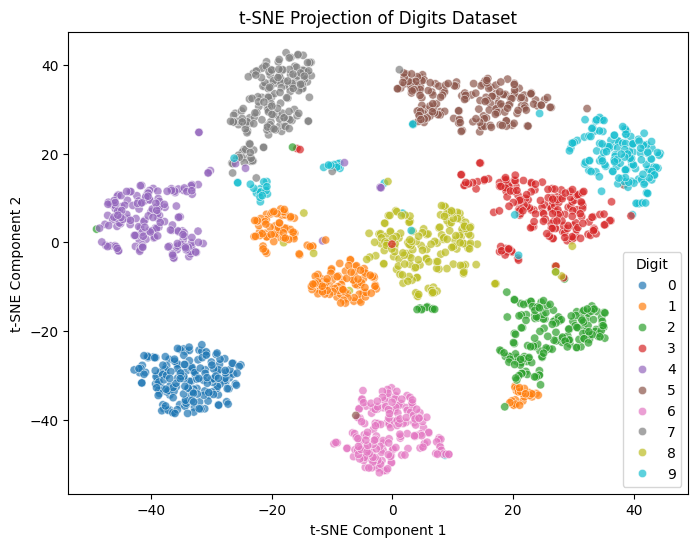

In [6]:
# Apply t-SNE (reduce to 2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=["t-SNE1", "t-SNE2"])
df_tsne["Target"] = y

# Plot t-SNE result
plt.figure(figsize=(8,6))
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="Target", palette="tab10", data=df_tsne, alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Digits Dataset")
plt.legend(title="Digit")
plt.show()


## 🎯 7. PCA vs. t-SNE vs. MCA: When to Use?

| **Method**  | **Best For** | **Strengths** | **Limitations** |
|-------------|------------|---------------|-----------------|
| **PCA** | High-dimensional numerical data | Fast, interpretable, preserves variance | Assumes linear relationships |
| **t-SNE** | Data visualization | Preserves local structures, good for clusters | Computationally expensive |
| **MCA** | High-dimensional categorical data | Handles categorical variables, useful for survey data | Interpretation can be complex |

🚀 **PCA is great for numerical feature reduction, t-SNE for visualization, and MCA for categorical feature reduction**.

---

## 💡 8. Interview Questions

### 🔹 **PCA Questions**
1️⃣ **What is the main objective of PCA?**  
   - Reduce dimensionality while **maximizing variance**.

2️⃣ **How does PCA differ from t-SNE?**  
   - **PCA** preserves **global variance**, while **t-SNE** focuses on **local structure**.

3️⃣ **What are Eigenvalues & Eigenvectors in PCA?**  
   - **Eigenvectors** define **new axes (principal components)**.  
   - **Eigenvalues** represent **variance captured by each component**.

4️⃣ **How do you decide the number of components in PCA?**  
   - Use the **explained variance plot** (elbow method).

5️⃣ **What assumptions does PCA make?**  
   - Linear relationships between features, and features should be **centered and standardized**.

---

### 🔹 **t-SNE Questions**
6️⃣ **What does t-SNE optimize?**  
   - t-SNE minimizes the **KL divergence** between **high-dimensional and low-dimensional similarity distributions**.

7️⃣ **Why does t-SNE use a t-distribution instead of a Gaussian?**  
   - To avoid the **crowding problem** (helps spread points better in lower dimensions).

8️⃣ **Why is t-SNE computationally expensive?**  
   - It uses **pairwise similarity calculations** and an **iterative optimization process**.

9️⃣ **What is perplexity in t-SNE?**  
   - A hyperparameter that controls **the balance between local and global structure**.

---

### 🔹 **MCA Questions**
🔟 **What is MCA used for?**  
   - **Dimensionality reduction for categorical data** (e.g., survey data, customer segmentation).

1️⃣1️⃣ **How does MCA differ from PCA?**  
   - **PCA** works on numerical data, while **MCA** works on **categorical data**.

1️⃣2️⃣ **What is the mathematical basis of MCA?**  
   - MCA is based on **Singular Value Decomposition (SVD)** applied to **a transformed indicator matrix**.

1️⃣3️⃣ **What type of distance does MCA use?**  
   - MCA uses **chi-square distance**, whereas PCA uses **Euclidean distance**.

1️⃣4️⃣ **How do we interpret MCA plots?**  
   - Categories that are **closer together** are more **similar** in terms of the dataset structure.

1️⃣5️⃣ **When should you use MCA instead of CA?**  
   - Use **CA for two categorical variables** (cross-tabulation), and **MCA for more than two categorical variables**.

---
